## CSE475 Project
## NYC Airbnb Price Prediction

### 1.1 Importing Necessary Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pickle

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [6]:
from sklearn.preprocessing import LabelEncoder

### 1.2 Exploratory Data Analysis

In [7]:
df = pd.read_csv("H:\Fall 2023\CSE475\Project\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
df.shape

(48895, 16)

In [13]:
dataset_columns = df.columns
dataset_columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,48895.000000,48895.000000,48895.000000,38843.000000
mean,152.720687,7.029962,23.274466,1.373221
std,240.154170,20.510550,44.550582,1.680442
min,0.000000,1.000000,0.000000,0.010000
25%,69.000000,1.000000,1.000000,0.190000
50%,106.000000,3.000000,5.000000,0.720000
75%,175.000000,5.000000,24.000000,2.020000
max,10000.000000,1250.000000,629.000000,58.500000


Section Summary -

In this section, we imported the dataset and created a DataFrame called 'df'. We printed the first five and last five rows of the DataFrame to have a generalized idea about our dataset. We then printed out the info, shape, columns and the statistical description of the dataset.

From the info -
* The dtypes: float64(3), int64(7), object(6).
* Total Memory Usage: 6.0+ MB
* We can also see that there are some missing values, which we will handle in the next section.

From the shape, we can see that we have 16 columns and 48,895 rows.

We can also see what our columns are from the df.columns

Moreover, we can get statistical description such as the mean, std. min. max and three quantiles of various columns from the describe() method

### 1.3 Data Cleaning

#### 1.3.1 Identifying Duplicate Values

In [15]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool


In [16]:
df[duplicates]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Section Summary -

Here we ran the duplicated method and saw that there are no duplicate values in this dataset.

#### 1.3.2 Identifying Missing Values

In [17]:
df.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [18]:
missing_values_count = df.isna().sum()
print(missing_values_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


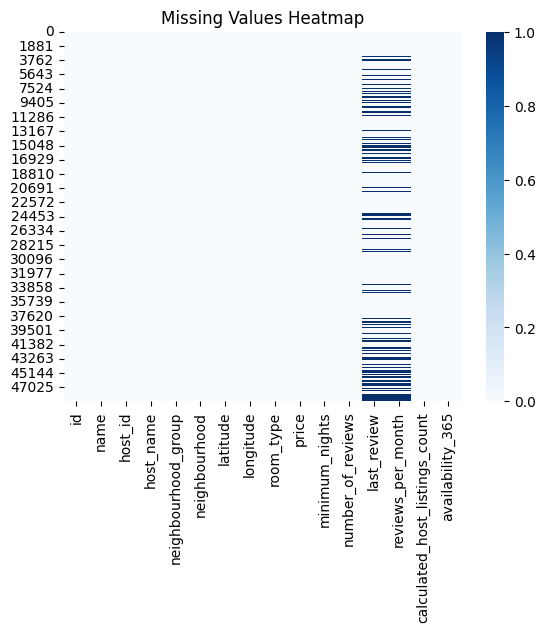

In [19]:
sns.heatmap(df.isnull(),cmap='Blues')
plt.title('Missing Values Heatmap')
plt.show()

Section Summary -

Here we saw that the columns - name, host_name, last_review, reviews_per_month have missing values. We used various methods such as isna() and isna().sum() to find out the number of missing values in this dataset.

We also created a heatmap to visualize the missing values. As we can see that the number of missing values in the name and host_name columns are insignificant when compared to the missing values in the last_review and reviews_per_month column.

#### 1.3.3 Handling Inconsistencies

In [20]:
df[df['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


In [8]:
mean_availability = df['availability_365'].mean()
df.loc[df['availability_365'] == 0, 'availability_365'] = mean_availability
df[df['availability_365'] == 0]

C:\Users\Zisan\AppData\Local\Temp\ipykernel_9276\2507290840.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '112.78132733408324' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['availability_365'] == 0, 'availability_365'] = mean_availability


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


#### 1.3.4 Handling Missing Values

We saw that the column 'last_review' has missing values. We will miss important data if we drop the rows containing the missing 'last_review' values. And as the 'last_review' column is a date object, we cannot replace it with any other way. So we are dropping this column from our dataset as it is not that important while predicting the price of the airbnb.

In [9]:
df.drop('last_review', axis=1, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194.000000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,112.781327


Now we are also going to handle the missing values of 'reviews_per_month' column.

First let's look at the rows that contain missing values for 'reviews_per_month' column -

In [10]:
df[df['reviews_per_month'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365.000000
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249.000000
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,112.781327
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365.000000
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365.000000


We can see that the rows that contain the missing values for reviews_per_month have number_of_reviews = 0 which makes sense. To confirm our assumption we are going to run the code below -

In [11]:
num_missing_reviews = df['reviews_per_month'].isnull().sum()
num_reviews_zero = np.sum(df['number_of_reviews']==0)
print(num_missing_reviews == num_reviews_zero)

True


As we can see that our assumption is True.

So we can fill the missing vaules of reviews_per_month with 0.

In [12]:
df['reviews_per_month'].fillna(0, inplace=True)
df[df['reviews_per_month'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


As we can see that all of the missing values of reviews_per_month column has been filled up.

The name and host_name missing values are not important as our predictions does not require these two columns.

Section Summary -

Handled the missing values of all the columns.

### 1.4 Data Visualization

#### 1.4.1 Correlation Analysis

In [ ]:
df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
df_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.075460
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.136297
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.082605
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.024539
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.215229
availability_365,0.075460,0.136297,0.082605,0.024539,0.215229,1.000000


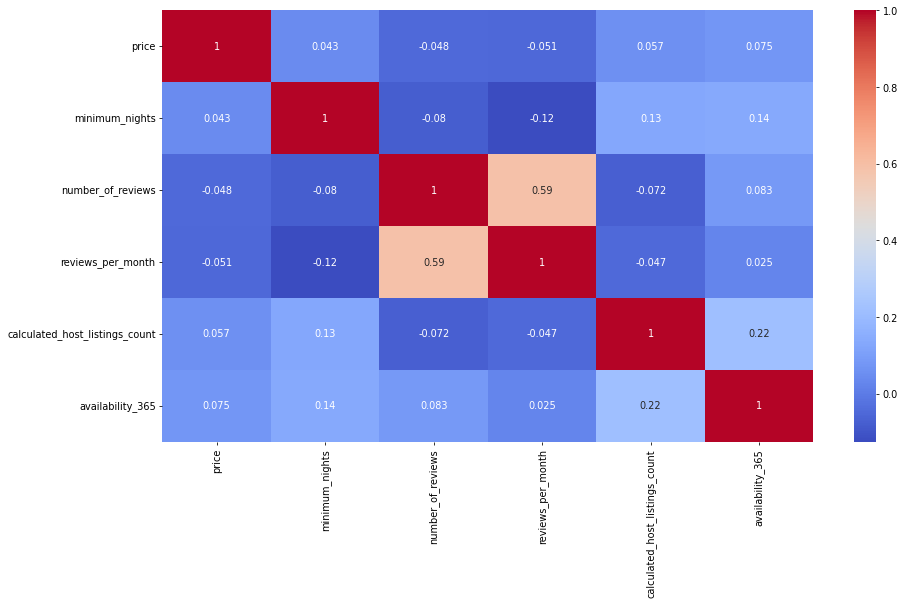

In [ ]:
plt.subplots(figsize=(15, 8), dpi=70)
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

#### 1.4.2 Visualizations of Relationships between different columns

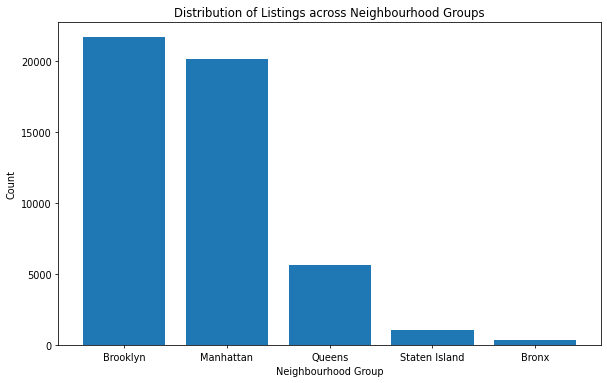

In [ ]:
plt.figure(figsize=(10, 6), dpi=70)
plt.bar(df['neighbourhood_group'].unique(), df['neighbourhood_group'].value_counts())
plt.title('Distribution of Listings across Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

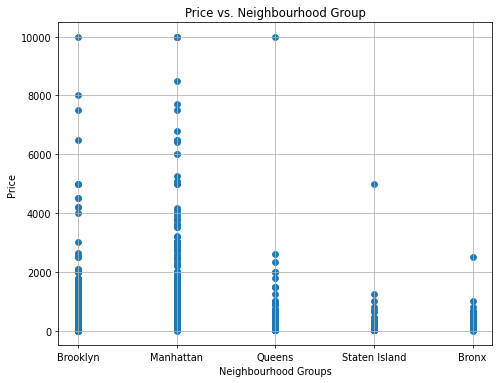

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(df["neighbourhood_group"], df["price"])
plt.title("Price vs. Neighbourhood Group")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Price")
plt.grid(True)
plt.show()


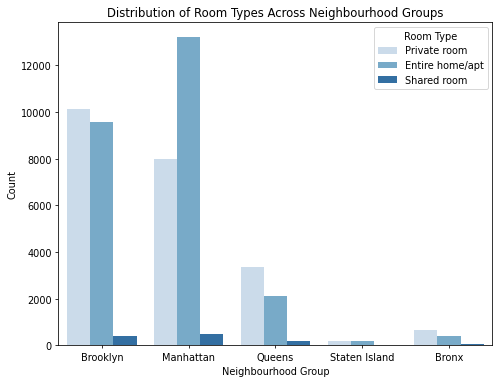

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='Blues')
plt.title('Distribution of Room Types Across Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.legend(title='Room Type', loc='upper right')
plt.show()

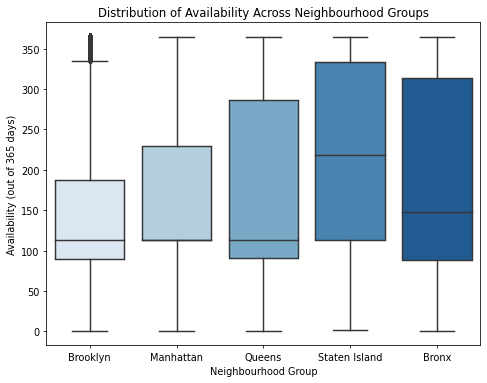

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df, palette='Blues')
plt.title('Distribution of Availability Across Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability (out of 365 days)')
plt.show()

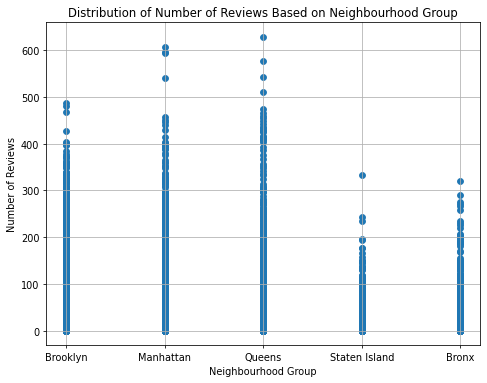

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(df["neighbourhood_group"], df["number_of_reviews"])
plt.title('Distribution of Number of Reviews Based on Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

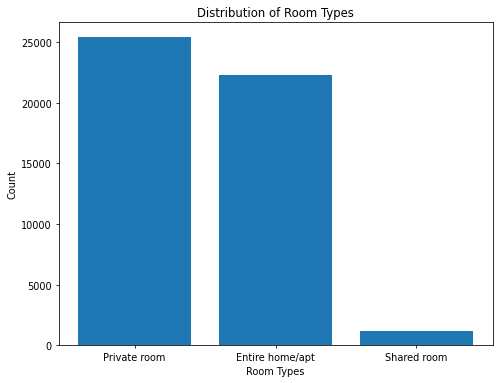

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
plt.bar(df['room_type'].unique(), df['room_type'].value_counts())
plt.title('Distribution of Room Types')
plt.xlabel('Room Types')
plt.ylabel('Count')
plt.show()

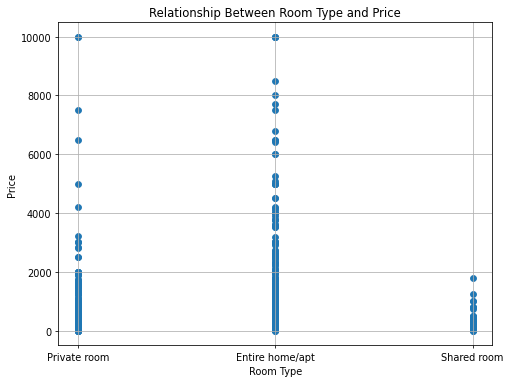

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(df['room_type'], df['price'])
plt.title('Relationship Between Room Type and Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

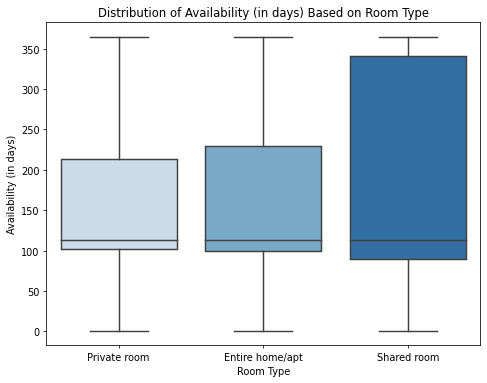

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
sns.boxplot(x='room_type', y='availability_365', data=df, palette='Blues')
plt.title('Distribution of Availability (in days) Based on Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (in days)')
plt.show()

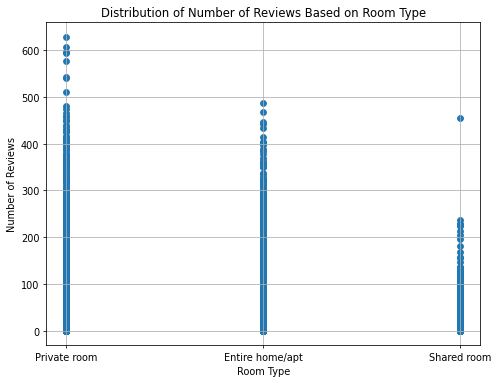

In [ ]:
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(df['room_type'], df['number_of_reviews'])
plt.title('Distribution of Number of Reviews Based on Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

### 1.5 Data Preprocessing


In [13]:
columns_to_drop = ['id', 'name', 'host_id', 'neighbourhood', 'host_name', 'latitude',	'longitude', 'number_of_reviews',	'reviews_per_month']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365.000000
1,Manhattan,Entire home/apt,225,1,2,355.000000
2,Manhattan,Private room,150,3,1,365.000000
3,Brooklyn,Entire home/apt,89,1,1,194.000000
4,Manhattan,Entire home/apt,80,10,1,112.781327


In [14]:
numerical_columns = ['minimum_nights', 'calculated_host_listings_count', 'availability_365']
other_columns = ['neighbourhood_group', 'room_type', 'price']

In [15]:
df_others = df[other_columns]
df_others.head()

,neighbourhood_group,room_type,price
0,Brooklyn,Private room,149
1,Manhattan,Entire home/apt,225
2,Manhattan,Private room,150
3,Brooklyn,Entire home/apt,89
4,Manhattan,Entire home/apt,80


In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])
print(df_scaled)

[[-2.93996210e-01 -3.47164266e-02  2.00761483e+00]
 [-2.93996210e-01 -1.56104443e-01  1.91281631e+00]
 [-1.96484417e-01 -1.86451447e-01  2.00761483e+00]
 ...
 [ 1.44806857e-01 -1.86451447e-01 -1.19657531e+00]
 [-2.93996210e-01 -3.47164266e-02 -1.43357162e+00]
 [-1.46083215e-03 -1.86451447e-01 -1.23449472e+00]]


In [17]:
df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns)
df_scaled.head()

,minimum_nights,calculated_host_listings_count,availability_365
0,-0.293996,-0.034716,2.007615
1,-0.293996,-0.156104,1.912816
2,-0.196484,-0.186451,2.007615
3,-0.293996,-0.186451,0.386560
4,0.144807,-0.186451,-0.383381


In [18]:
df_scaled = pd.concat([df_scaled, df_others], axis=1)
df_scaled.head()

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,-0.293996,-0.034716,2.007615,Brooklyn,Private room,149
1,-0.293996,-0.156104,1.912816,Manhattan,Entire home/apt,225
2,-0.196484,-0.186451,2.007615,Manhattan,Private room,150
3,-0.293996,-0.186451,0.386560,Brooklyn,Entire home/apt,89
4,0.144807,-0.186451,-0.383381,Manhattan,Entire home/apt,80


In [19]:
label_encoder_neighbourhood = LabelEncoder()
label_encoder_room = LabelEncoder()
df_scaled['neighbourhood_group'] = label_encoder_neighbourhood.fit_transform(df_scaled['neighbourhood_group'])
df_scaled['room_type'] = label_encoder_room.fit_transform(df_scaled['room_type'])
df_scaled.head()

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,-0.293996,-0.034716,2.007615,1,1,149
1,-0.293996,-0.156104,1.912816,2,0,225
2,-0.196484,-0.186451,2.007615,2,1,150
3,-0.293996,-0.186451,0.386560,1,0,89
4,0.144807,-0.186451,-0.383381,2,0,80


In [20]:
print("Mapping for 'neighbourhood_group':")
for class_label, original_value in enumerate(label_encoder_neighbourhood.classes_):
    print(f"{original_value}: {class_label}")

Mapping for 'neighbourhood_group':
Bronx: 0
Brooklyn: 1
Manhattan: 2
Queens: 3
Staten Island: 4


In [21]:
print("\nMapping for 'room_type':")
for class_label, original_value in enumerate(label_encoder_room.classes_):
    print(f"{original_value}: {class_label}")


Mapping for 'room_type':
Entire home/apt: 0
Private room: 1
Shared room: 2


In [21]:
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']

In [22]:
X

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,-0.293996,-0.034716,2.007615,1,1
1,-0.293996,-0.156104,1.912816,2,0
2,-0.196484,-0.186451,2.007615,2,1
3,-0.293996,-0.186451,0.386560,1,0
4,0.144807,-0.186451,-0.383381,2,0
...,...,...,...,...,...
48890,-0.245240,-0.156104,-1.367213,1,1
48891,-0.147729,-0.156104,-1.111257,1,1
48892,0.144807,-0.186451,-1.196575,2,0
48893,-0.293996,-0.034716,-1.433572,2,2


In [23]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.6 Model Training

#### 1.6.1 Linear Regression

In [37]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = linear_reg.predict(X_test)

In [39]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred) * 100
print(f"RMSE: {lr_rmse:.2f}")
print(f"MAE: {lr_mae:.2f}")
print(f"R2 Score: {lr_r2:.2f}%")

RMSE: 200.40
MAE: 74.11
R2 Score: 9.21%


In [40]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

   Actual Values  Predicted Values
0             89        206.164264
1             30        102.253593
2            120         94.491469
3            470        253.728221
4            199        189.572717


<Figure size 500x300 with 0 Axes>

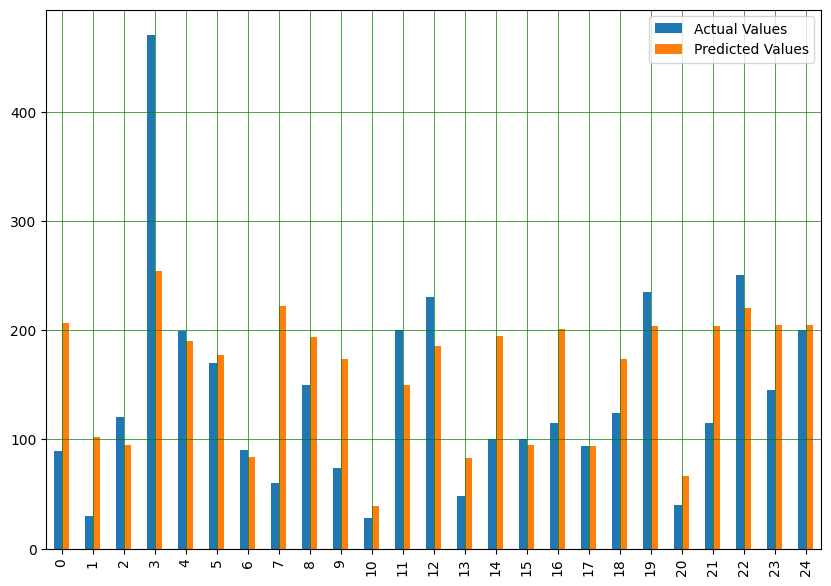

In [41]:
plt.figure(figsize=(10, 6),dpi=50)
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### 1.6.2 Random Forest Regressor

In [45]:
rf_reg = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [46]:
y_pred_rf = rf_reg.predict(X_test)

In [47]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)*100
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}%")

RMSE: 195.07
MAE: 66.86
R2 Score: 13.99%


In [48]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred_rf.flatten()})
print(error_diff.head(5))

   Actual Values  Predicted Values
0             89        148.569557
1             30         61.249478
2            120         96.200211
3            470        293.835362
4            199        165.435766


<Figure size 500x300 with 0 Axes>

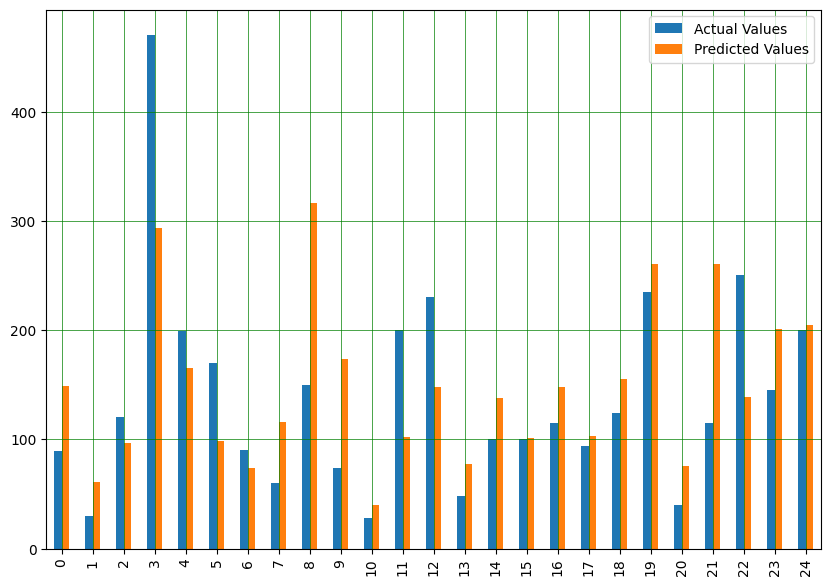

In [49]:
plt.figure(figsize=(10, 6),dpi=50)
df2 = error_diff.head(25)
df2.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### 1.6.3 Gradient Boosting Regressor

In [25]:
gb_reg = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [26]:
y_pred_gb = gb_reg.predict(X_test)

In [27]:
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb) * 100
print(f"RMSE: {rmse_gb:.2f}")
print(f"MAE: {mae_gb:.2f}")
print(f"R2 Score: {r2_gb:.2f}%")

RMSE: 191.06
MAE: 66.64
R2 Score: 17.48%


In [28]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred_gb.flatten()})
print(error_diff.head(5))

   Actual Values  Predicted Values
0             89        171.563364
1             30         53.449427
2            120        101.857664
3            470        312.296296
4            199        219.210734


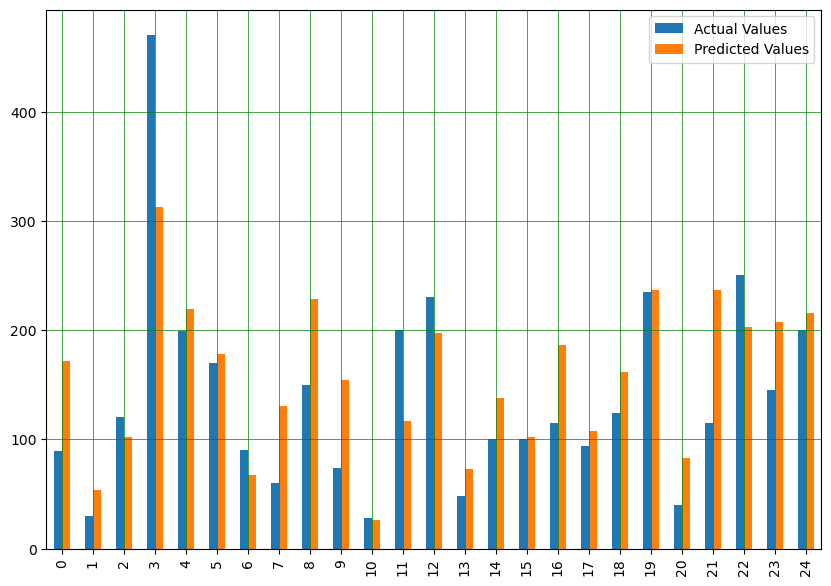

In [29]:
df3 = error_diff.head(25)
df3.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### 1.7 Result Analysis

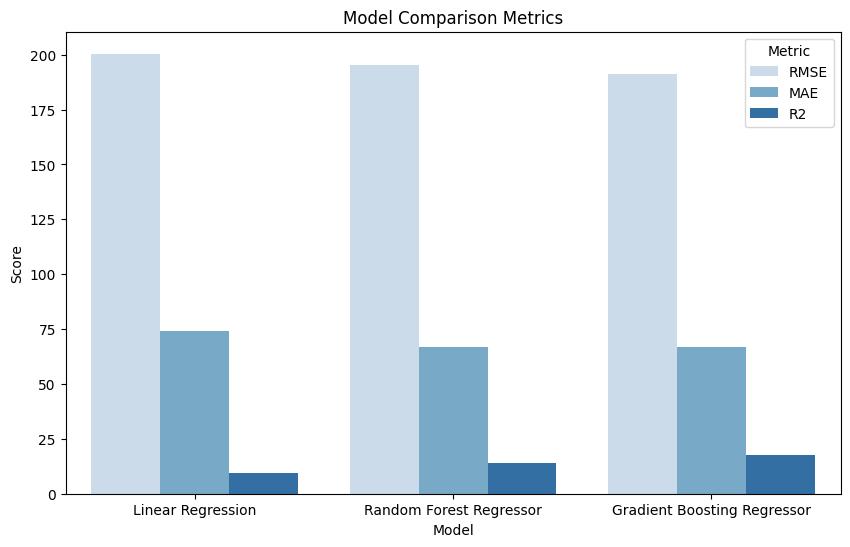

In [52]:
data = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'RMSE': [lr_rmse, rmse_rf, rmse_gb],
    'MAE': [lr_mae, mae_rf, mae_gb],
    'R2': [lr_r2, r2_rf, r2_gb]
})
data_melted = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted, palette='Blues')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Metrics')
plt.show()


### Converting Model into Pickle

In [30]:
pickle_out = open("gb_reg.pkl", "wb")
pickle.dump(gb_reg, pickle_out)
pickle_out.close()

### 1.8 Explainable AI

#### 1.8.1 Feature Importance for Linear Regression

In [53]:
X.columns

Index(['minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group', 'room_type'],
      dtype='object')

In [54]:
feature_importance = linear_reg.coef_
print(f"Feature importance: {feature_importance}")

Feature importance: [   3.54674679    2.19756053   18.48843416   11.44893151 -109.59013574]


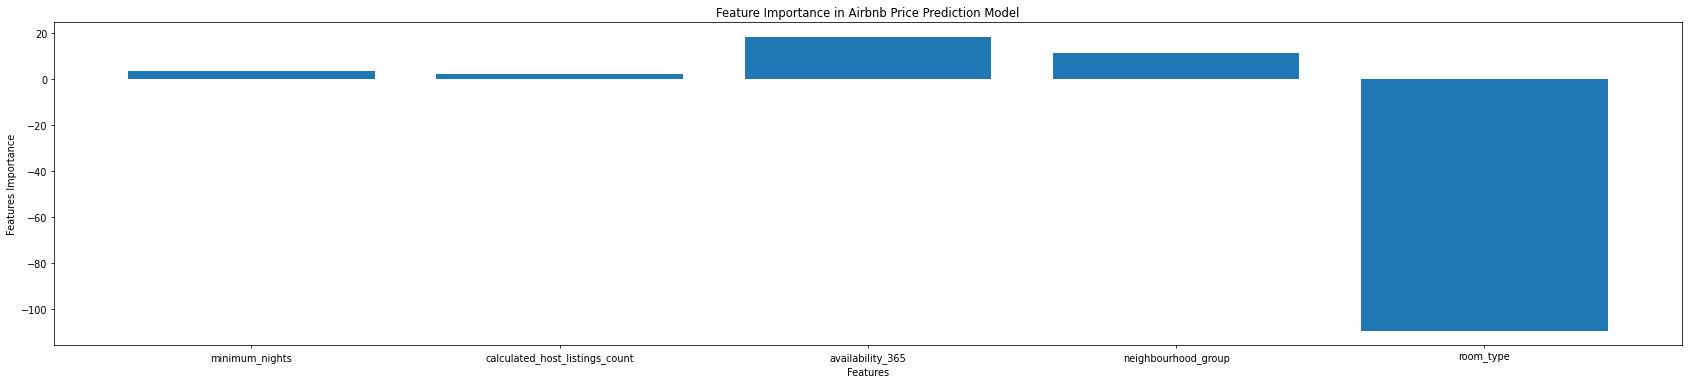

In [55]:
plt.figure(figsize=(30, 6), dpi=70)
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Features Importance')
plt.title('Feature Importance in Airbnb Price Prediction Model')
plt.show()

#### 1.8.2 PDP For Random Forest Regressor

In [56]:
f_names = ['minimum_nights', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_Brooklyn',
           'neighbourhood_group_Manhattan',	'neighbourhood_group_Queens',	'neighbourhood_group_Staten Island',	'room_type_Private room',
           'room_type_Shared room']

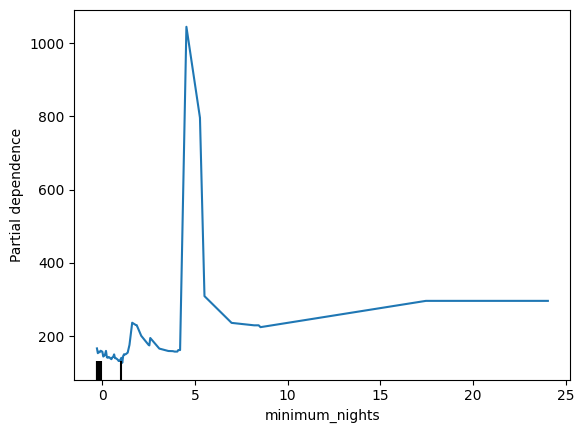

In [57]:
PartialDependenceDisplay.from_estimator(rf_reg, X_test ,features = [0], feature_names = f_names)
plt.show()

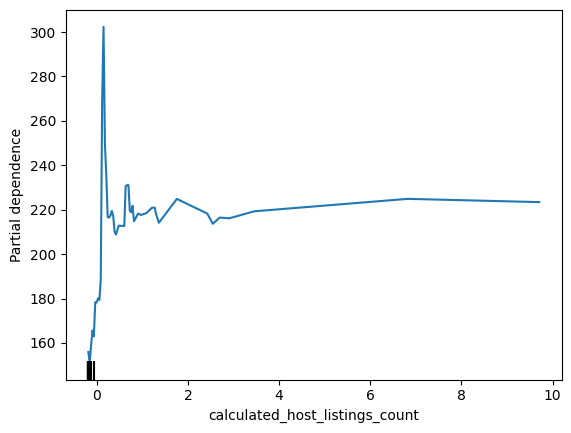

In [58]:
PartialDependenceDisplay.from_estimator(rf_reg, X_test, features = [1], feature_names = f_names)
plt.show()

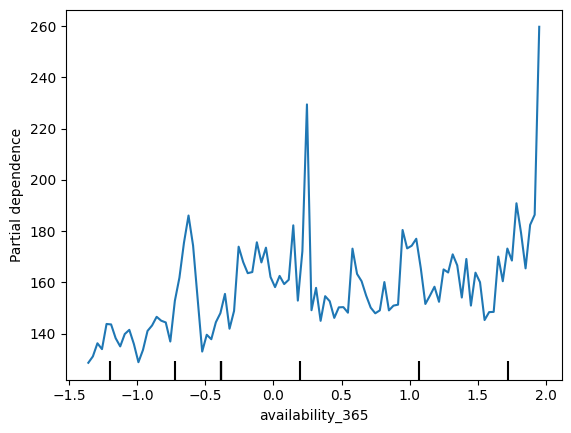

In [59]:
PartialDependenceDisplay.from_estimator(rf_reg, X_test, features = [2], feature_names = f_names)
plt.show()